In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import optuna


RND = 42


In [ ]:
df = pd.read_csv("/kaggle/input/forest-cleaned-data/cleaned_data.csv")
df.shape


(517922, 55)

In [ ]:
target_col = 'Cover_Type'

X = df.drop(columns=[target_col])
y = df[target_col]

print("Classes:", np.unique(y))
print("Shape X, y:", X.shape, y.shape)



Classes: [1 2 3 4 5 6 7]
Shape X, y: (517922, 54) (517922,)


In [27]:
RND = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=RND
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (362545, 54) Test shape: (155377, 54)


In [ ]:
def objective(trial):

    C = trial.suggest_float("C", 1e-3, 10, log=True)
    max_iter = trial.suggest_int("max_iter", 100, 500)

    model = LogisticRegression(
        penalty="l2",
        C=C,
        solver="lbfgs",      
        multi_class="multinomial",
        max_iter=max_iter,
        n_jobs=-1,
        random_state=RND
    )

    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=RND)

    scores = cross_val_score(
        model, X_train, y_train,
        cv=skf,
        scoring="f1_macro",
        n_jobs=-1
    )

    return scores.mean()


In [ ]:
study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=20, show_progress_bar=True)

best = study.best_trial
print("\nBest Trial:")
print("Best f1_macro:", best.value)
print("Best params:", best.params)


[I 2025-12-06 22:01:12,396] A new study created in memory with name: no-name-c14adf99-b437-4f1d-a9e5-5eceee07014a


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:01:38,214] Trial 0 finished with value: 0.5427945733019216 and parameters: {'C': 0.29188597536830607, 'max_iter': 333}. Best is trial 0 with value: 0.5427945733019216.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:02:12,618] Trial 1 finished with value: 0.5457910910478578 and parameters: {'C': 0.6497117550263618, 'max_iter': 452}. Best is trial 1 with value: 0.5457910910478578.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:02:45,170] Trial 2 finished with value: 0.5474021672998437 and parameters: {'C': 1.562700441494468, 'max_iter': 452}. Best is trial 2 with value: 0.5474021672998437.
[I 2025-12-06 22:02:54,526] Trial 3 finished with value: 0.4431943128024117 and parameters: {'C': 0.007724503190385679, 'max_iter': 482}. Best is trial 2 with value: 0.5474021672998437.
[I 2025-12-06 22:03:01,324] Trial 4 finished with value: 0.3739304862817754 and parameters: {'C': 0.0019321861520790495, 'max_iter': 293}. Best is trial 2 with value: 0.5474021672998437.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:03:27,575] Trial 5 finished with value: 0.546471724469269 and parameters: {'C': 1.1446524701729701, 'max_iter': 436}. Best is trial 2 with value: 0.5474021672998437.
[I 2025-12-06 22:03:37,271] Trial 6 finished with value: 0.4285557817938199 and parameters: {'C': 0.00585773348059349, 'max_iter': 262}. Best is trial 2 with value: 0.5474021672998437.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:03:46,102] Trial 7 finished with value: 0.5405694863302154 and parameters: {'C': 0.41574734819720294, 'max_iter': 137}. Best is trial 2 with value: 0.5474021672998437.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:04:10,575] Trial 8 finished with value: 0.5449599898775899 and parameters: {'C': 0.5605698019639269, 'max_iter': 333}. Best is trial 2 with value: 0.5474021672998437.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:04:24,114] Trial 9 finished with value: 0.5446499484916298 and parameters: {'C': 1.5512160988161876, 'max_iter': 178}. Best is trial 2 with value: 0.5474021672998437.
[I 2025-12-06 22:04:47,415] Trial 10 finished with value: 0.5285372864345865 and parameters: {'C': 0.06458638559076078, 'max_iter': 397}. Best is trial 2 with value: 0.5474021672998437.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:05:17,079] Trial 11 finished with value: 0.5473342487674869 and parameters: {'C': 8.846111868461513, 'max_iter': 399}. Best is trial 2 with value: 0.5474021672998437.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:05:45,758] Trial 12 finished with value: 0.5474615118482329 and parameters: {'C': 7.6781253635245115, 'max_iter': 389}. Best is trial 12 with value: 0.5474615118482329.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:06:14,237] Trial 13 finished with value: 0.547328914771364 and parameters: {'C': 9.00263599046352, 'max_iter': 378}. Best is trial 12 with value: 0.5474615118482329.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:06:50,808] Trial 14 finished with value: 0.5476179831317933 and parameters: {'C': 3.149266191391363, 'max_iter': 494}. Best is trial 14 with value: 0.5476179831317933.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:07:20,777] Trial 15 finished with value: 0.548064950609165 and parameters: {'C': 3.9973317099630976, 'max_iter': 500}. Best is trial 15 with value: 0.548064950609165.
[I 2025-12-06 22:07:45,196] Trial 16 finished with value: 0.5324640328795669 and parameters: {'C': 0.08217515325172868, 'max_iter': 494}. Best is trial 15 with value: 0.548064950609165.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:07:58,450] Trial 17 finished with value: 0.5469310842450428 and parameters: {'C': 2.296100553730948, 'max_iter': 216}. Best is trial 15 with value: 0.548064950609165.
[I 2025-12-06 22:08:29,326] Trial 18 finished with value: 0.5390593924569413 and parameters: {'C': 0.14592190875466407, 'max_iter': 498}. Best is trial 15 with value: 0.548064950609165.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[I 2025-12-06 22:08:36,436] Trial 19 finished with value: 0.5406852952555039 and parameters: {'C': 3.010940910542174, 'max_iter': 108}. Best is trial 15 with value: 0.548064950609165.

Best Trial:
Best f1_macro: 0.548064950609165
Best params: {'C': 3.9973317099630976, 'max_iter': 500}


In [30]:
best_params = study.best_params

final_model = LogisticRegression(
    penalty="l2",
    C=best_params["C"],
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=best_params["max_iter"],
    n_jobs=-1,
    random_state=RND
)

final_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3.9973317099630976, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, random_state=42)

In [36]:
y_pred = final_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7225265000611416

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.71      0.71     58422
           2       0.74      0.79      0.77     76055
           3       0.67      0.75      0.71      8208
           4       0.74      0.53      0.62       677
           5       0.14      0.00      0.01      2553
           6       0.49      0.34      0.40      4395
           7       0.74      0.58      0.65      5067

    accuracy                           0.72    155377
   macro avg       0.61      0.53      0.55    155377
weighted avg       0.71      0.72      0.71    155377



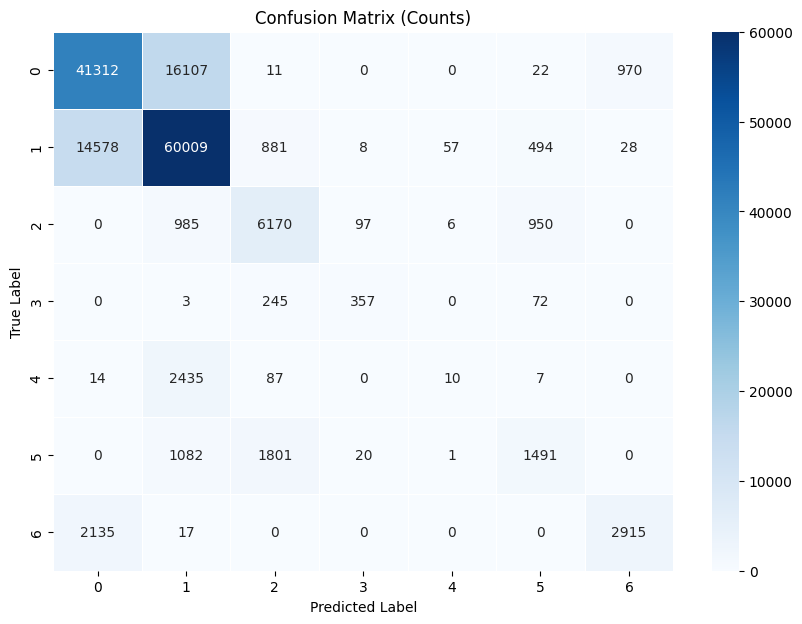

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
